In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics





In [3]:
# define function to generate new column "age"
def get_ages(x):
    x_new = 2021 - x
    return x_new

In [4]:
################ Preprocessing ####################

# Function to get the filtered data set
def get_data():

    # usage of pathlib
    #PROJECT_DIR = Path(__file__).parent
    #path = PROJECT_DIR / 'data/autoscout24.csv'
    data = pd.read_csv('autoscout24.csv')

    return data


# Function to get data without nan-values
def get_data_without_na(data):

    # drop NaN values from features with object-type: "model" and "gear" 
    data = data.dropna(subset=["model", "gear"])

    # replace NaN values from features with numeric-type with median value: "hp"
    data["hp"] = data["hp"].fillna(data["hp"].median())

    return data

In [5]:
# Initialise preprocessed data without nan values for machine learning
dataml = get_data_without_na(get_data())

In [17]:
dataml.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [6]:
# add new column "age" in ml dataset 
dataml["age"] = dataml["year"].apply(get_ages)

In [19]:
dataml.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year,age
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011,10
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011,10
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011,10
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011,10
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011,10




The model performance for test set
--------------------------------------
MAE: 4591.281326038122
MSE: 122764857.39929478
RMSE: 11079.930387836142
R2 score is 0.668662388951119


Regression results for training data set:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                 1.917e+04
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:27:37   Log-Likelihood:            -3.3231e+05
No. Observations:               30883   AIC:                         6.646e+05
Df Residuals:                   30879   BIC:                         6.647e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                              

C:\Users\Oliver\AppData\Local\Temp\ipykernel_22724\3532454219.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  metric_values = metric_values.applymap(lambda x: '{:,.2f}'.format(x))


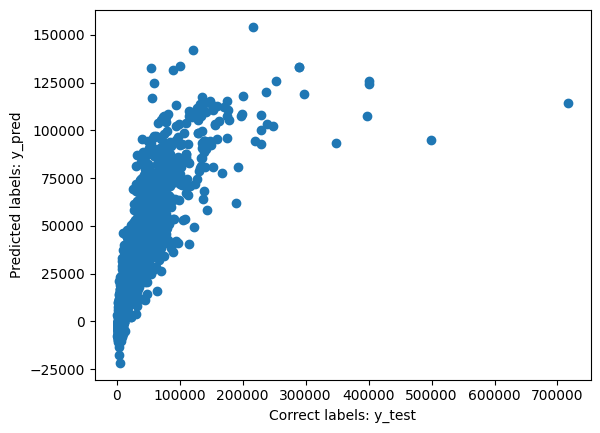

In [34]:
#################### linear regression without dummys and no standardisation ###################

# Define the features(X) and the label(y)
X = dataml[["mileage", "hp", "age"]]
y = dataml[["price"]]

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

# Initialise the model for linear regression
lr = LinearRegression()

# Train model:
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Visualisation of the correct vs. predicted labels
plt.scatter(y_test, y_pred)
plt.xlabel('Correct labels: y_test')
plt.ylabel('Predicted labels: y_pred')
print("\n")

# Model Performance for test data setz:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination'

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculation of the RMSE error measure'
print('R2 score is {}'.format(r2))
print("\n")

# OLS Regression Results: fit model
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
# Output results
print("Regression results for training data set:")
print(results.summary())
print("\n")
print(results.params)


# create a new dataframe with correct and predicted values 
corr_vs_pred = pd.DataFrame({
    "correct": y_test.squeeze(),
    "predicted": y_pred.squeeze()
}).reset_index(drop=True)

# create a new dataframe with metric values
metric_values = pd.DataFrame({
    "MAE": metrics.mean_absolute_error(y_test, y_pred).round(2),
    "RMSE": np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2),
    "R-squared in %": (r2_score(y_test, y_pred) * 100).round(2)
}, index=[0])

# thousand seperator
metric_values = metric_values.applymap(lambda x: '{:,.2f}'.format(x))

# saving the results into csv file. this is used for visualization later on machine learning
corr_vs_pred.to_csv("lin_reg_evaluation_data.csv")
metric_values.to_csv("lin_reg_metrics.csv")





The model performance for test set
--------------------------------------
MAE: 2891.3018955676343
MSE: 87035848.59456463
RMSE: 9329.300541549974
R2 score is 0.7650936044739721


Regression results for training data set:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     540.2
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:29:51   Log-Likelihood:            -3.0646e+05
No. Observations:               30883   AIC:                         6.145e+05
Df Residuals:                   30087   BIC:                         6.211e+05
Df Model:                         795                                         
Covariance Type:            nonrobust                              

C:\Users\Oliver\AppData\Local\Temp\ipykernel_22724\2188331006.py:71: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  metric_values = metric_values.applymap(lambda x: '{:,.2f}'.format(x))


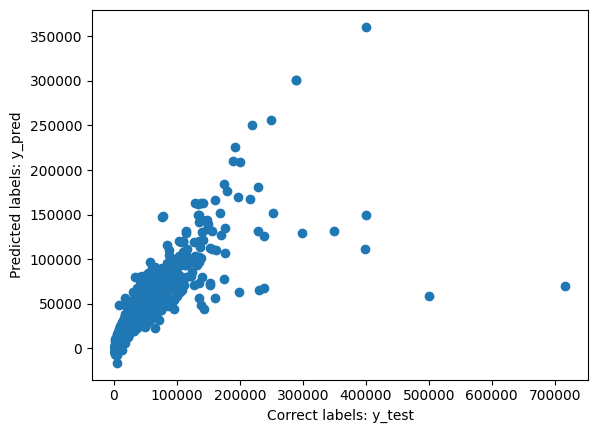

In [36]:
#################### ridge regression with dummys and standardisation ###################

# Define the features(X) and the label(y)
X = dataml[["mileage", "hp", "age", "make", "model", "fuel", "gear", "offerType"]].reset_index(drop=True)
y = dataml[["price"]].reset_index(drop=True)

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["make"], prefix="make", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["model"], prefix="model", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["fuel"], prefix="fuel", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["gear"], prefix="gear", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["offerType"], prefix="offerType", dtype=float, drop_first=True)

# Standardisation: very different scales in X => therefore standardisation of the data
scaler = StandardScaler()
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=100)

# Initialise the model for the ridge regression - 
ridge_reg = Ridge(alpha=1, solver="cholesky")

# Train model:
ridge_reg.fit(X_train, y_train)

# Make predictions
y_pred = ridge_reg.predict(X_test)

# Visualisation of the correct vs. predicted labels
plt.scatter(y_test, y_pred)
plt.xlabel('Correct labels: y_test')
plt.ylabel('Predicted labels: y_pred')
print("\n")

# Model Performance for test data setz:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination'

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculation of the RMSE error measure'
print('R2 score is {}'.format(r2))
print("\n")

# OLS Regression Results: fit model
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train, columns=scaled_X.columns)))
results = model.fit()
# Output results
print("Regression results for training data set:") 
print(results.summary())
print("\n")
print(results.params)

# create a new dataframe with correct and predicted values 
corr_vs_pred = pd.DataFrame({
    "correct": y_test.squeeze(),
    "predicted": y_pred.squeeze()
}).reset_index(drop=True)

# create a new dataframe with metric values
metric_values = pd.DataFrame({
    "MAE": metrics.mean_absolute_error(y_test, y_pred).round(2),
    "RMSE": np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2),
    "R-squared in %": (r2_score(y_test, y_pred) * 100).round(2)
}, index=[0])

# thousand seperator
metric_values = metric_values.applymap(lambda x: '{:,.2f}'.format(x))

# saving the results into csv file. this is used for visualization later on machine learning
corr_vs_pred.to_csv("ridge_reg_evaluation_data.csv")
metric_values.to_csv("ridge_reg_metrics.csv")





The model performance for test set
--------------------------------------
MAE: 2971.4471448844283
MSE: 84790357.00050208
RMSE: 9208.16795027665
R2 score is 0.7711540996040003


Regression results for training data set:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     540.2
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:30:26   Log-Likelihood:            -3.0646e+05
No. Observations:               30883   AIC:                         6.145e+05
Df Residuals:                   30087   BIC:                         6.211e+05
Df Model:                         795                                         
Covariance Type:            nonrobust                               

C:\Users\Oliver\AppData\Local\Temp\ipykernel_22724\1335541771.py:71: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  metric_values = metric_values.applymap(lambda x: '{:,.2f}'.format(x))


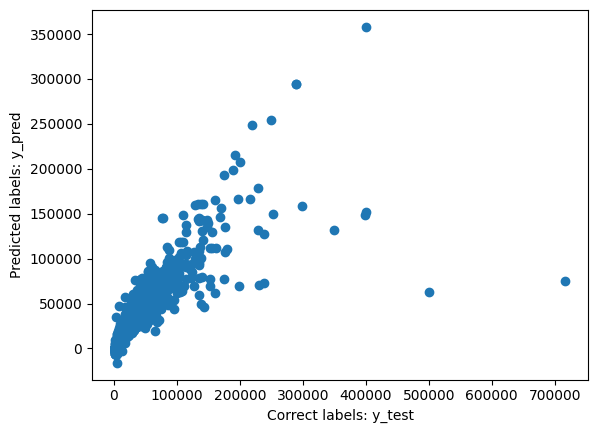

In [37]:
#################### lasso regression with dummys and standardisation ###################

# Define the features(X) and the label(y)
X = dataml[["mileage", "hp", "age", "make", "model", "fuel", "gear", "offerType"]].reset_index(drop=True)
y = dataml[["price"]].reset_index(drop=True)

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["make"], prefix="make", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["model"], prefix="model", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["fuel"], prefix="fuel", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["gear"], prefix="gear", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["offerType"], prefix="offerType", dtype=float, drop_first=True)

# Standardisation: very different scales in X => therefore standardisation of the data
scaler = StandardScaler()
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=100)

# Initialise the model for lasso regression
lasso_reg = Lasso(alpha=28.48)

# Train the model:
lasso_reg.fit(X_train, y_train)

# Make predictions
y_pred = lasso_reg.predict(X_test)

# Visualisation of the correct vs. predicted labels
plt.scatter(y_test, y_pred)
plt.xlabel('Correct labels: y_test')
plt.ylabel('Predicted labels: y_pred')
print("\n")

# Model Performance for test data setz:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination'

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculation of the RMSE error measure'
print('R2 score is {}'.format(r2))
print("\n")

# OLS Regression Results: fit model
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train, columns=scaled_X.columns)))
results = model.fit()
# Output results
print("Regression results for training data set:") 
print(results.summary())
print("\n")
print(results.params)

# create a new dataframe with correct and predicted values 
corr_vs_pred = pd.DataFrame({
    "correct": y_test.squeeze(),
    "predicted": y_pred.squeeze()
}).reset_index(drop=True)

# create a new dataframe with metric values
metric_values = pd.DataFrame({
    "MAE": metrics.mean_absolute_error(y_test, y_pred).round(2),
    "RMSE": np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2),
    "R-squared in %": (r2_score(y_test, y_pred) * 100).round(2)
}, index=[0])

# thousand seperator
metric_values = metric_values.applymap(lambda x: '{:,.2f}'.format(x))

# saving the results into csv file. this is used for visualization later on machine learning
corr_vs_pred.to_csv("lasso_reg_evaluation_data.csv")
metric_values.to_csv("lasso_reg_metrics.csv")


In [21]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

# Definieren der Kreuzvalidierung
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

y_train = y_train.squeeze()

# Erstellen und Anpassen des Modells
model = LassoCV(alphas=np.arange(0.01, 1, 0.1), cv=cv, n_jobs=-1, max_iter=10000, tol=1e-3)
model.fit(X_train, y_train)

# Bester Alpha-Wert
print(model.alpha_)

0.91


In [24]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

# Definieren der Kreuzvalidierung
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

y_train = y_train.squeeze()

# Erstellen und Anpassen des Modells
model = LassoCV(alphas=np.logspace(-4, 2, 100), cv=cv, n_jobs=-1, max_iter=10000, tol=1e-3)
model.fit(X_train, y_train)

# Bester Alpha-Wert
print(model.alpha_)

28.48035868435805


In [8]:
from sklearn.linear_model import ElasticNetCV

y_train = y_train.squeeze()

# Erstellen und Anpassen des Modells
model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-4, 2, 1000), cv=5, max_iter=10000, tol=1e-3)
model.fit(X_train, y_train)

# Vorhersagen machen
y_pred = model.predict(X_test)

# Modellleistung bewerten
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Bestes alpha: {model.alpha_}")
print(f"Bestes l1_ratio: {model.l1_ratio_}")
print(f"Mittlerer quadratischer Fehler: {mse}")
print(f"R2-Score: {r2}")

# Feature-Wichtigkeit (Koeffizienten)
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature-Wichtigkeit:")
print(feature_importance)

Bestes alpha: 0.0001
Bestes l1_ratio: 0.5
Mittlerer quadratischer Fehler: 85975209.8243139
R2-Score: 0.767956227571213

Feature-Wichtigkeit:
            feature   importance
1                hp  7083.692922
401       model_F12  4311.869672
2               age  3142.186433
714     model_S 650  2993.432824
26     make_Ferrari  2976.912273
..              ...          ...
547    model_Levorg     0.000000
541  model_Landwind     0.000000
264        model_C7     0.000000
274       model_CLC     0.000000
595     model_NP300     0.000000

[923 rows x 2 columns]


c:\Users\Oliver\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.758e+11, tolerance: 1.149e+10
  model = cd_fast.enet_coordinate_descent(


c:\Users\Oliver\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.758e+11, tolerance: 1.149e+09
  model = cd_fast.enet_coordinate_descent(




The model performance for test set
--------------------------------------
MAE: 2892.9545366132024
MSE: 85975209.8243139
RMSE: 9272.281802464477
R2 score is 0.767956227571213


Regression results for training data set:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     540.2
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:35:42   Log-Likelihood:            -3.0646e+05
No. Observations:               30883   AIC:                         6.145e+05
Df Residuals:                   30087   BIC:                         6.211e+05
Df Model:                         795                                         
Covariance Type:            nonrobust                                

C:\Users\Oliver\AppData\Local\Temp\ipykernel_22724\669372180.py:72: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  metric_values = metric_values.applymap(lambda x: '{:,.2f}'.format(x))


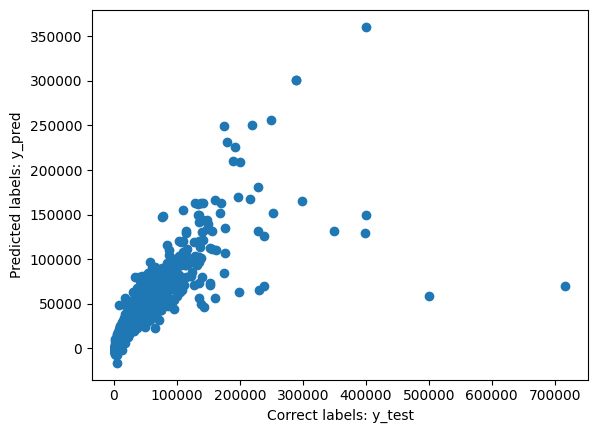

In [38]:
#################### elastic net regression with dummys and standardisation ###################

# Define the features(X) and the label(y)
X = dataml[["mileage", "hp", "age", "make", "model", "fuel", "gear", "offerType"]].reset_index(drop=True)
y = dataml[["price"]].reset_index(drop=True)

# Create the dummies for the categorical variables
X = pd.get_dummies(data=X, columns=["make"], prefix="make", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["model"], prefix="model", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["fuel"], prefix="fuel", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["gear"], prefix="gear", dtype=float, drop_first=True)
X = pd.get_dummies(data=X, columns=["offerType"], prefix="offerType", dtype=float, drop_first=True)

# Standardisation: very different scales in X => therefore standardisation of the data
scaler = StandardScaler()
scaler.fit(X)
scaled_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=100)

# Initialise the model for lasso regression
enr = ElasticNet(alpha=0.0001, l1_ratio=0.5, max_iter=10000)

# Train the model:
enr.fit(X_train, y_train)

# Make predictions
y_pred = enr.predict(X_test)

# Visualisation of the correct vs. predicted labels
plt.scatter(y_test, y_pred)
plt.xlabel('Correct labels: y_test')
plt.ylabel('Predicted labels: y_pred')
print("\n")

# Model Performance for test data setz:
r2 = r2_score(y_test, y_pred) # Calculation of the R² coefficient of determination'

print("The model performance for test set")
print("--------------------------------------")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Calculation of the RMSE error measure'
print('R2 score is {}'.format(r2))
print("\n")

# OLS Regression Results: fit model
model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train, columns=scaled_X.columns)))
results = model.fit()
# Output results
print("Regression results for training data set:") 
print(results.summary())
print("\n")
print(results.params)


# create a new dataframe with correct and predicted values 
corr_vs_pred = pd.DataFrame({
    "correct": y_test.squeeze(),
    "predicted": y_pred.squeeze()
}).reset_index(drop=True)

# create a new dataframe with metric values
metric_values = pd.DataFrame({
    "MAE": metrics.mean_absolute_error(y_test, y_pred).round(2),
    "RMSE": np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2),
    "R-squared in %": (r2_score(y_test, y_pred) * 100).round(2)
}, index=[0])

# thousand seperator
metric_values = metric_values.applymap(lambda x: '{:,.2f}'.format(x))

# saving the results into csv file. this is used for visualization later on machine learning
corr_vs_pred.to_csv("elastic_reg_evaluation_data.csv")
metric_values.to_csv("elastic_reg_metrics.csv")